In [5]:
import pandas as pd

pd.options.display.max_columns = 999


train= pd.read_csv('C:/Users/mosto/REPOSITORY/Prediction_of_Insurance_Premium/data/Train.csv', index_col=False)
test= pd.read_csv('C:/Users/mosto/REPOSITORY/Prediction_of_Insurance_Premium/data/Test.csv', index_col=False)
val= pd.read_csv('C:/Users/mosto/REPOSITORY/Prediction_of_Insurance_Premium/data/Validation.csv', index_col=False)

print(train.shape)
print(test.shape)
print(val.shape)

(6210, 54)
(1827, 54)
(1097, 54)


In [4]:
train.head()

Washington  Arizona  Nevada  California  Oregon  Customer Lifetime Value  \
0           0        0       0           1       0                  7659.72   
1           0        0       0           1       0                  4836.75   
2           0        0       0           0       1                  2648.47   
3           0        1       0           0       0                 13575.68   
4           0        0       1           0       0                  3494.15   

  Response  Coverage  Education  Employed  Unemployed  Medical_Leave  \
0       No         1          1         0           1              0   
1       No         2          2         0           1              0   
2       No         1          1         0           0              0   
3       No         1          2         1           0              0   
4       No         2          1         1           0              0   

   Disabled  Retired  Female  Male  Income  Suburban  Rural  Urban  Married  \
0         0        0       0     1       0         1      0      0        0   
1         0        0       1     0       0         1      0      0        0   
2         1        0       1     0   26540         1      0      0        1   
3         0        0       1     0   48534         1      0      0        1   
4         0        0       0     1   35001         1      0      0        0   

   Single  Divorced  Monthly Premium Auto  Months Since Last Claim  \
0       1         0                    73                       22   
1       1         0                   136                        8   
2       0         0                    69                       15   
3       0         0                   115                       29   
4       1         0                    96                       18   

   Months Since Policy Inception  Number of Open Complaints  \
0                             93                          0   
1                              2                          0   
2                              4                          0   
3                             79                          1   
4                             87                          3   

   Number of Policies  Corporate Auto  Personal Auto  Special Auto  \
0                   2               0              1             0   
1                   1               0              1             0   
2                   1               0              1             0   
3                   2               0              1             0   
4                   1               0              1             0   

   Corporate L3  Personal L3  Corporate L2  Personal L1  Special L2  \
0             0            0             0            0           0   
1             0            0             0            0           0   
2             0            0             0            0           0   
3             0            1             0            0           0   
4             0            0             0            0           0   

   Corporate L1  Personal L2  Special L1  Special L3 Renew Offer Type  Agent  \
0             0            1           0           0           Offer1      1   
1             0            1           0           0           Offer1      0   
2             0            1           0           0           Offer2      0   
3             0            0           0           0           Offer4      0   
4             0            1           0           0           Offer1      0   

   Call Center  Web  Branch  Total Claim Amount  Two Door  Four Door  SUV  \
0            0    0       0              525.60         1          0    0   
1            0    0       1              979.20         0          0    1   
2            0    0       1              378.43         0          1    0   
3            1    0       0              552.00         0          0    1   
4            0    1       0              460.80         0          1    0   

   Luxury SUV  Sports Car  L

In [6]:
import plotly.express as px

In [7]:
px.scatter(train, 
            x = "Months Since Last Claim", 
            y = "Monthly Premium Auto", 
            trendline="ols")

# Explore relationship between month since last claim and insurance premium

# if month since last claim is 0, that means you recently had a claim
# if month since last claim is 35, that means you haven't had a clain in 35 months. 

In [8]:
px.scatter(train, 
            x = "Months Since Last Claim", 
            y = "Customer Lifetime Value", 
            trendline="ols")

In [9]:
px.scatter(train, 
            x="Customer Lifetime Value", 
            y="Monthly Premium Auto", 
            trendline="ols",
            color="Monthly Premium Auto")

In [10]:
# a sample of the data. 
train_sample = train.sample(n=100, random_state=42)
train_sample.shape

(100, 54)

In [11]:

px.scatter_3d(train_sample, 
            x="Months Since Last Claim",
            y="Customer Lifetime Value", 
            z="Monthly Premium Auto",
            color="Months Since Last Claim")

In [12]:
train_sample.columns.to_list()

['Washington',
 'Arizona',
 'Nevada',
 'California',
 'Oregon',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Employed',
 'Unemployed',
 'Medical_Leave',
 'Disabled',
 'Retired',
 'Female',
 'Male',
 'Income',
 'Suburban',
 'Rural',
 'Urban',
 'Married',
 'Single',
 'Divorced',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Corporate Auto',
 'Personal Auto',
 'Special Auto',
 'Corporate L3',
 'Personal L3',
 'Corporate L2',
 'Personal L1',
 'Special L2',
 'Corporate L1',
 'Personal L2',
 'Special L1',
 'Special L3',
 'Renew Offer Type',
 'Agent',
 'Call Center',
 'Web',
 'Branch',
 'Total Claim Amount',
 'Two Door',
 'Four Door',
 'SUV',
 'Luxury SUV',
 'Sports Car',
 'Luxury Car',
 'Vehicle Size',
 'Activation_date']

In [13]:
# Look at relationship between month since policy inception, and premium price

px.scatter(train_sample, x="Months Since Policy Inception", y="Monthly Premium Auto")

In [15]:

# Look at relationship between month since policy inception, and customer lifetime value

px.scatter(train_sample, x="Months Since Policy Inception", y="Customer Lifetime Value")

In [16]:
import seaborn as sns

In [17]:

# using seaborn to see from a high level perspective what the relationship between multiple variables. 

sns.pairplot(train_sample)

KeyboardInterrupt: 

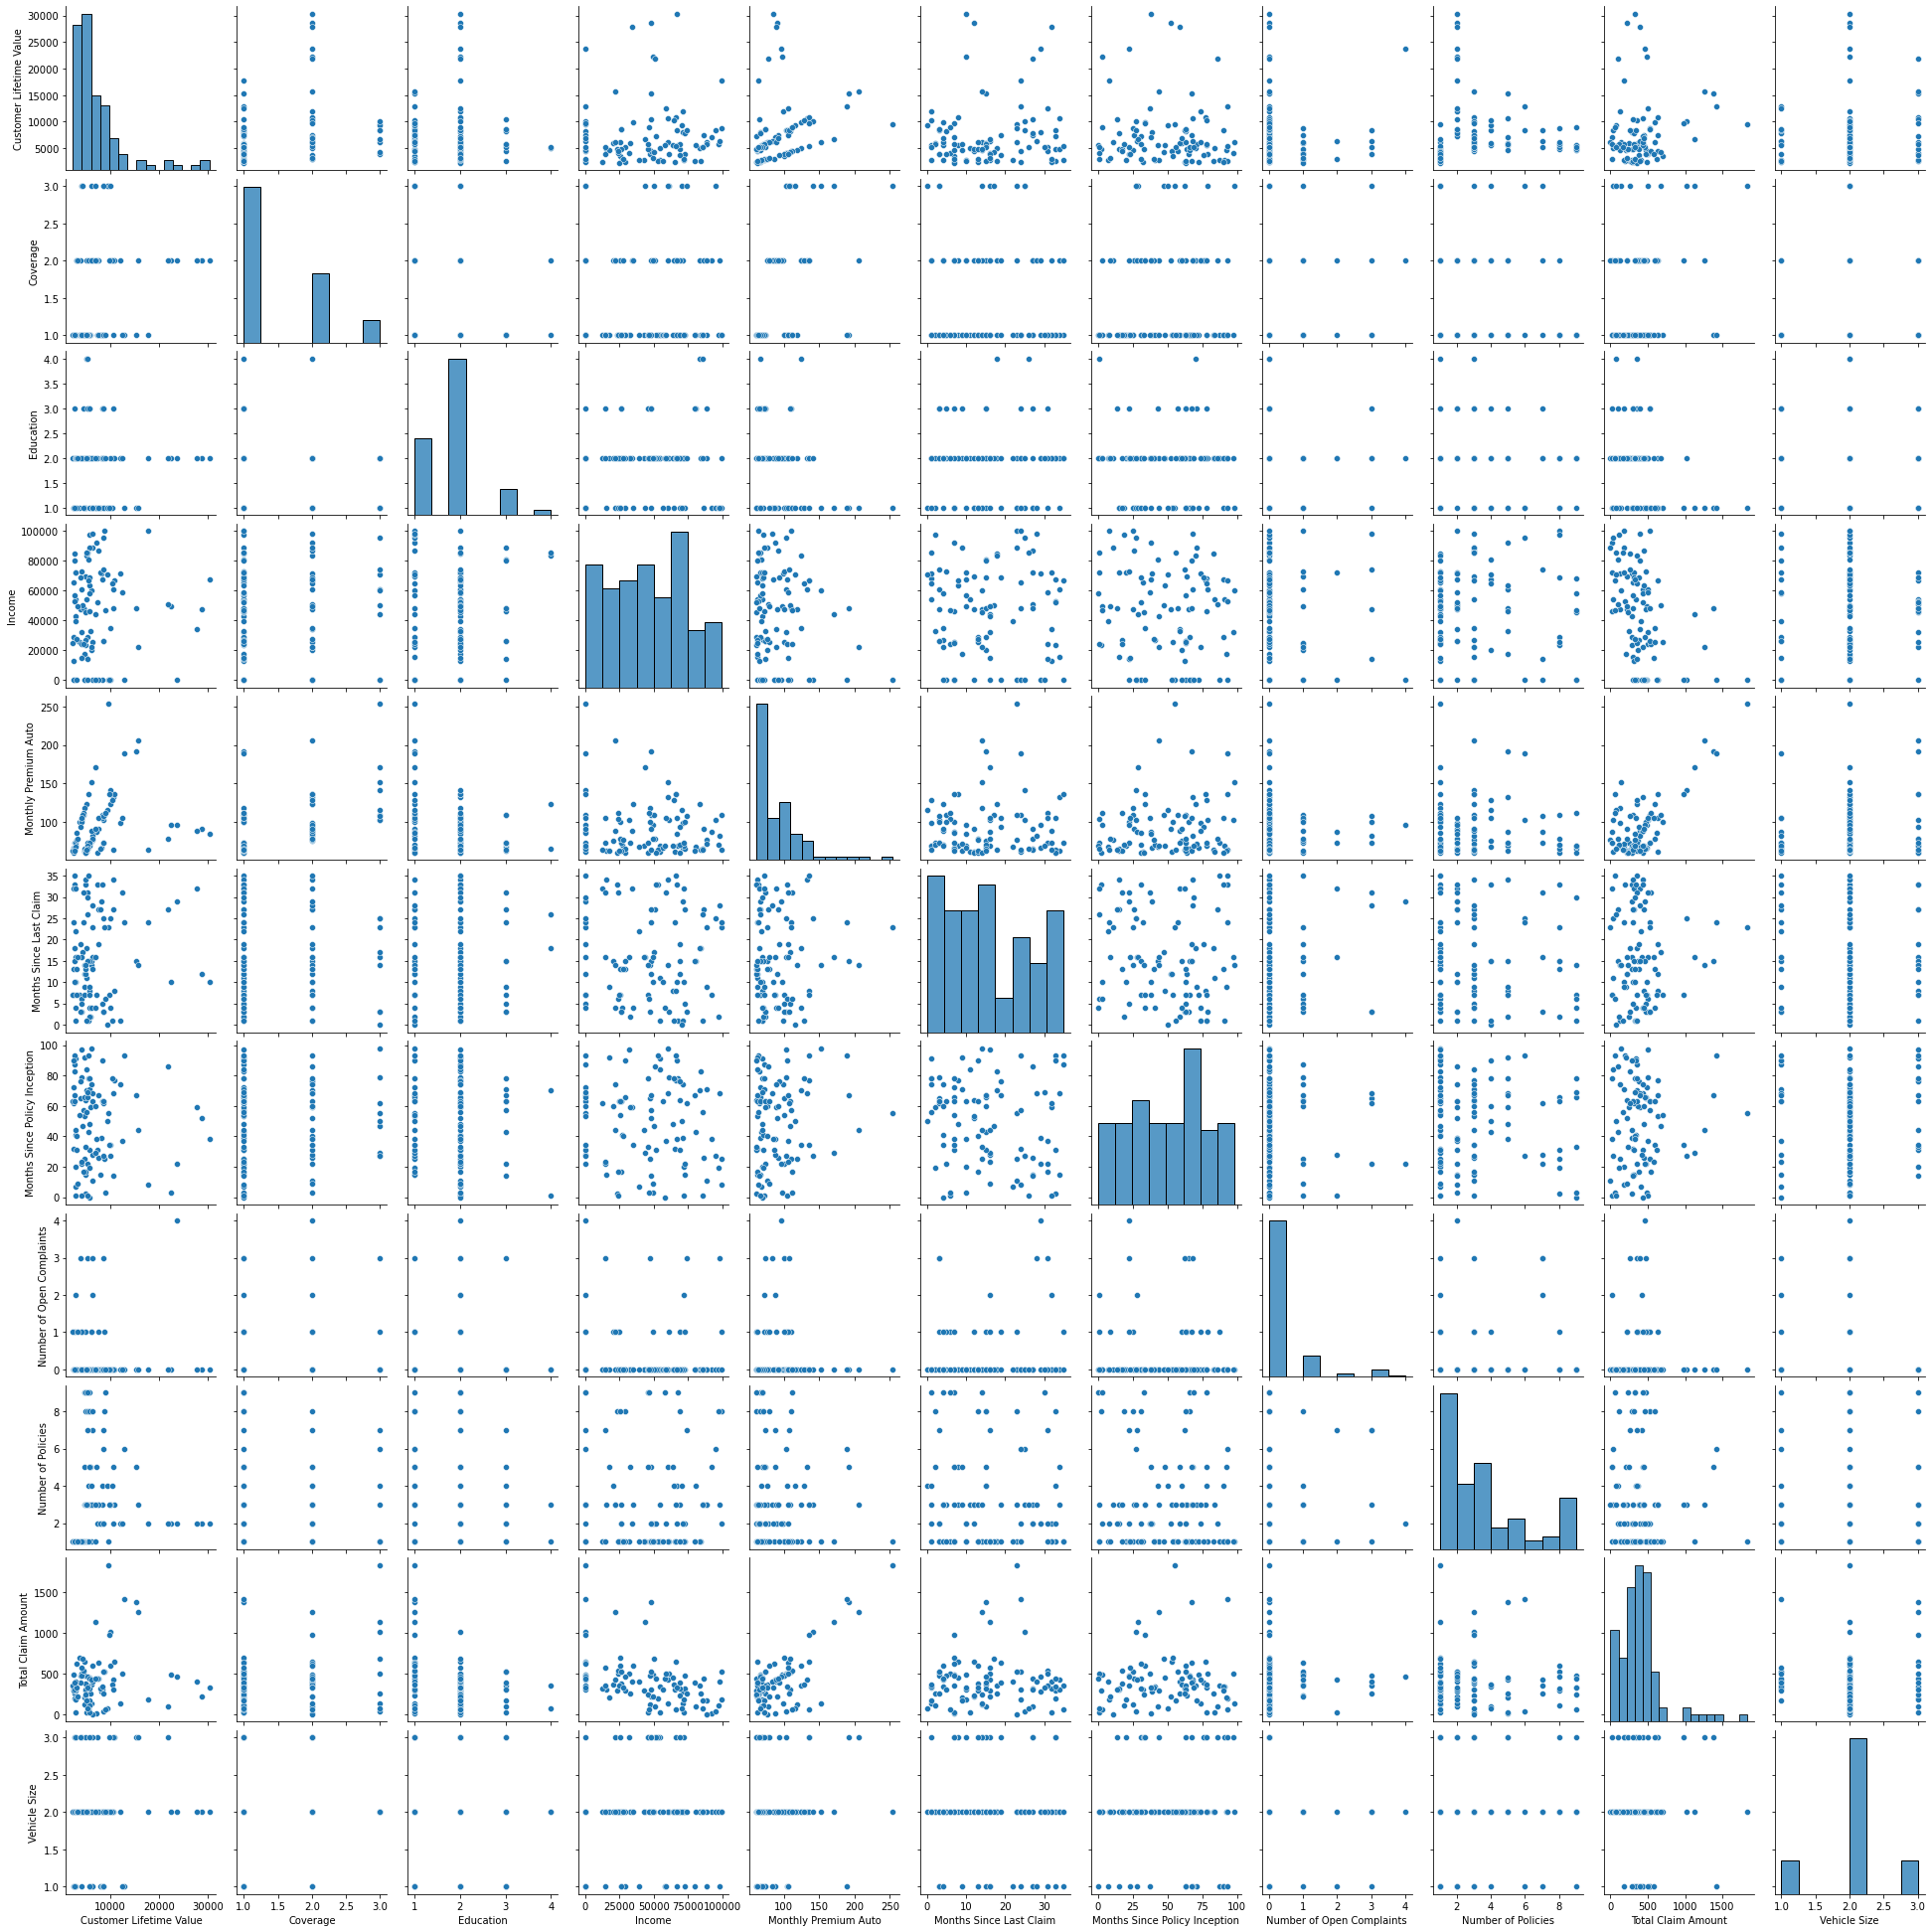

In [18]:
a = sns.pairplot(train_sample, vars=['Customer Lifetime Value', 
                                "Coverage", 
                                "Education", 
                                "Income",
                                "Monthly Premium Auto", 
                                'Months Since Last Claim', 
                                "Months Since Policy Inception", 
                                "Number of Open Complaints",
                                "Number of Policies", 
                                "Total Claim Amount",
                                "Vehicle Size"])

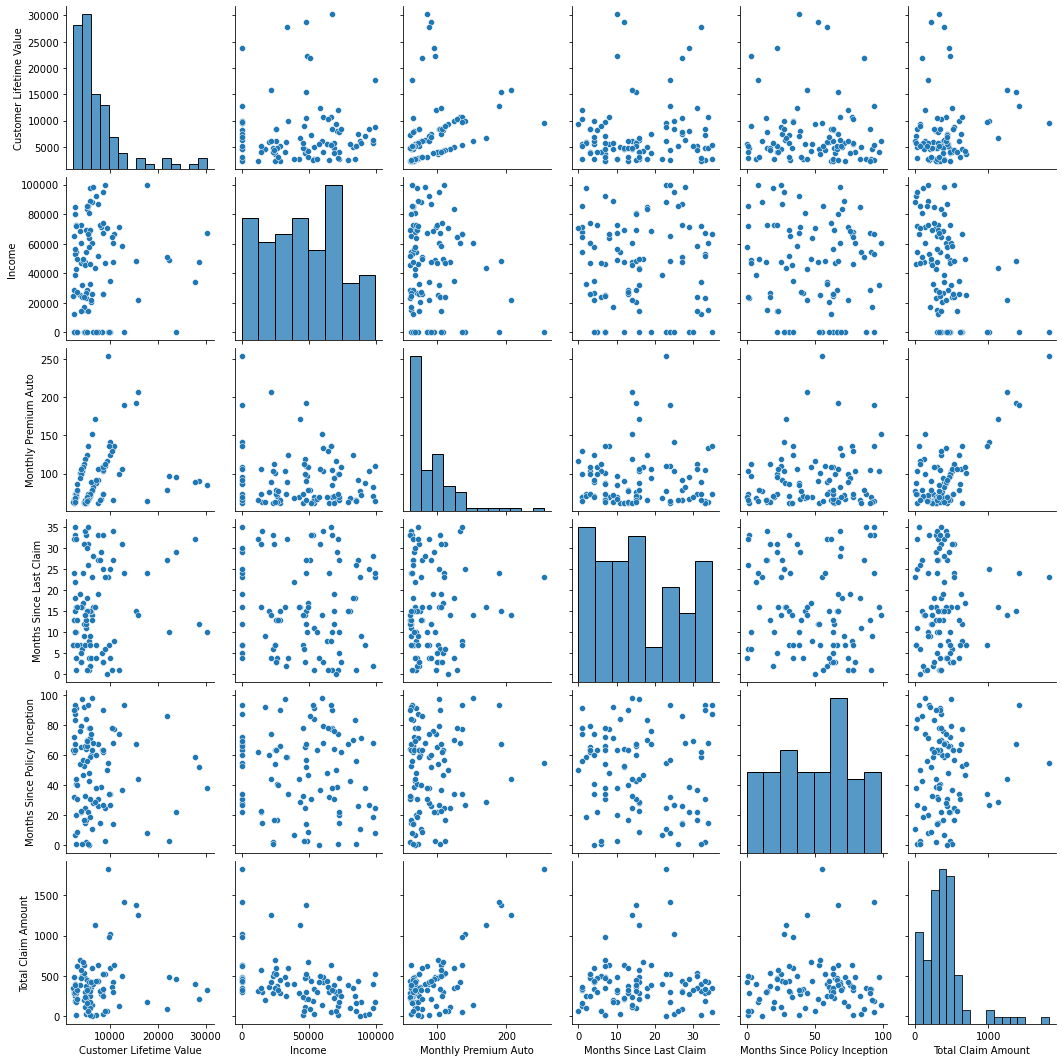

In [19]:
b = sns.pairplot(train_sample, vars=['Customer Lifetime Value',
                                "Income",
                                "Monthly Premium Auto", 
                                'Months Since Last Claim', 
                                "Months Since Policy Inception", 
                                "Total Claim Amount"])

In [20]:
# look at total claim amount and monthly premium auto

px.scatter(train_sample, x='Monthly Premium Auto', y='Total Claim Amount')